# Important: Use File -> Save a Copy in Drive to create a copy of this document. Edit *your copy* of the file. If you attempt to edit this file, your changes will not be saved.

# Primality Testing

In this notebook you will test different primality testing algorithms in terms of their success and running time. First you should use Eratosthenes' sieve to acquire all primes under 10,000.

In [ ]:
# Imports
import math
import random
from datetime import datetime
import numpy as np

N = 10000

In [ ]:
def sieve(n: int):
    is_prime = np.ones(n + 1, dtype=bool)
    print(is_prime)
    is_prime[0] = False
    is_prime[1] = False
    for i in range(2, int(math.sqrt(n))+1):
      if is_prime[i]:
        for j in range(i*i, n+1, i):
          is_prime[j] = False


    # TODO: Set is_prime[0] and is_prime[1] to False
    # Then iterate over all elements and if it is True (meaning a prime)
    # mark all its multiples as False
    # primes = []
    # primes = np.sum(is_prime)
    primes = np.nonzero(is_prime)[0]

    return set(primes)

primes = sieve(N)
print(len(primes))

[ True  True  True ...  True  True  True]
1229


Write the Fermat primality test

In [ ]:
def fermat_is_prime(p: int, base=None):
    if p == 2: return True
    if base is None:
        while True:
            base = random.randint(2, p)
            if math.gcd(p, base) == 1:
                break
    # TODO: Compute (base)^(p-1) % p. Consider using the `pow` built-in function.
    # If the result is 1, return True
    # Otherwise, return False
    # Make sure that you don't use numbers significantly bigger than `p`
    if pow(base, p-1, p) == 1:
      return True
    return False

Using a single or even a random base might not always work: $2^{340} \equiv 1\ (mod\ 341)$, but $341 = 11 \cdot 31$ is composite. These numbers are called *pseudoprimes*. There is a proof that for every composite number where the algorithm succeeds for at least one base, it will succeed for at least half of the bases. Write the repeated fermat primality test that answers the primality question correctly with probability $1 - \delta$. In order to achieve that, you will call `fermat_is_prime` iteratively until the failure probability is less than $\delta$.

In [ ]:
def boosted_fermat(p: int, delta=1e-6):
    trust = 1
    k = 1 # number of iterations for a precise result, large k could make sure the correct result
    while trust > delta:
        # TODO: Use the fermat primality testing multiple times to avoid pseudoprimes
        ...
        if fermat_is_prime(p) is False:
          return False
        k = k+1
        trust = (0.5) ** k # inorder to make sure that pr >= 1 - (1/2)^k
    return True

There exist certain numbers that have **no** (non coprime) bases for which the fermat test works. Those are called [Carmichael numbers](https://en.wikipedia.org/wiki/Carmichael_number). Use your primality testing with $\delta = 10^{-6}$ to print all Carmichael numbers.

In [ ]:
res = []
for p in range(2, N+1):
    # TODO: Find all the Carmichael numbers
    ...
    may_carmichael = True
    for i in range(2, int(math.sqrt(p))+1):
      if p % i == 0:
        may_carmichael = False
        continue
    if may_carmichael is False and boosted_fermat(p, 1e-6):
      res.append(p)
print(res)

[561, 1105, 1729, 2465, 2821, 6601, 8911]


## Generating Primes for cryptographic use

In the [public key](https://en.wikipedia.org/wiki/Public-key_cryptography) cryptosystem [RSA](https://en.wikipedia.org/wiki/RSA_(cryptosystem)), creating a new key requires finding large primes up to thousands of bits long. The way to produce such a number is quite simple:

1. Produce a large integer
2. Check if it is prime
3. Repeat until success

It is known that the number of primes grows in a rate of $\Omega(1 / \log n)$, so generating a prime will take on average tries proporional to the bit length.

In [ ]:
def generate_prime(bits):
    i = 0
    while True:
        i += 1
        if i % 10 == 0:
            print(f'\rAttempting try {i:5d}. Elapsed time: {(datetime.now() - start).total_seconds():8.2f}s', end='')
        p = random.randint((2**(bits-1)), 2**(bits)-1)       # TODO: Generate a number in [ 2**(bits-1), 2**(bits) )
        if boosted_fermat(p, 1e-6):   # TODO: Check if it is prime using the boosted fermat test you
            print()
            return p, i

start = datetime.now()
p, i = generate_prime(2048)
print(f'After {i} tries completed in {(datetime.now() - start).total_seconds():.2f} seconds, generated the following prime\n{p}')

Attempting try   160. Elapsed time:     7.90s
After 162 tries completed in 9.16 seconds, generated the following prime
23029492715222564863045382322317768444016954370533933728107833629994907245283494376172113102233415220565829449426527170257205379355142724847749891926044065290449502488129065789022456621866493579100766613963914026595559603561300865216085248554326120710309020864094036237625243717258840051488728673707353474903388061416188057348467092513405440686645540584039494809353709087650032738195171558333073154056198549338307614527958044979651981753044724168607917195746621360233641181484061901852448494679539058767184920194365580974444446238699689123289089870367421138228362280422326225366368473522557098503511038434588207401659


# Prime density

The probability of a random number we sample being prime is $\Omega(1/\log n)$, meaning that on average we need to produce $O(\log n)$ numbers. That number is the same as the bits needed to represent the number itself. Additionally, checking if a number is prime also takes $O(\log n)$ multiplications, which take $O(\log^{1.58} n)$ each due to Karatsuba's algorithm, which python uses for large numbers. As a result, finding a prime will take will take $O(\log^{3.58} n)$ time on average.

You can check that yourself by generating primes of different bit lengths. Note that this cell could take ~5 minutes to run.

Producing 25   64-bit length primes...
Attempting try    20. Elapsed time:     0.00s
Attempting try    10. Elapsed time:     0.00s
Attempting try   140. Elapsed time:     0.02s

Attempting try    40. Elapsed time:     0.03s
Attempting try    20. Elapsed time:     0.03s
Attempting try    10. Elapsed time:     0.03s
Attempting try   120. Elapsed time:     0.04s
Attempting try    80. Elapsed time:     0.04s

Attempting try    80. Elapsed time:     0.05s



Attempting try    50. Elapsed time:     0.05s
Attempting try    10. Elapsed time:     0.05s

Attempting try    30. Elapsed time:     0.05s
Attempting try    90. Elapsed time:     0.06s
Attempting try   200. Elapsed time:     0.07s
Attempting try   100. Elapsed time:     0.07s
Attempting try   110. Elapsed time:     0.07s
Attempting try    40. Elapsed time:     0.08s

Attempting try    50. Elapsed time:     0.08s
Producing 25  128-bit length primes...
Attempting try    60. Elapsed time:     0.08s
Attempting try    30. Elapsed time:     0

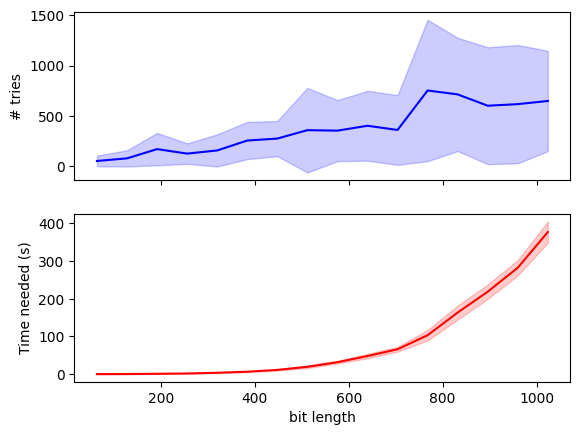

Total time: 417.35s


In [ ]:
import matplotlib.pyplot as plt
T = 25

bit_lengths = list(range(64, 1025, 64))
tries = np.zeros([len(bit_lengths), T])
times = np.zeros([len(bit_lengths), T])

start = datetime.now()
# TODO: Iterate through the different bit lengths and create `T` primes.
#       For each one, record in `tries[b, t]` the number of tries it took
#       and in `times[b, t]` the amount of time it takes.
for b, bit_length in enumerate(bit_lengths):
    print(f'Producing {T} {bit_length:4d}-bit length primes...')
    ...
    for t in range(T):
      start_time = datetime.now()
      prime_num, index_tires = generate_prime(bit_length)
      end_time = datetime.now()
      total_time = (datetime.now() - start).total_seconds()
      tries[b, t] = index_tires
      times[b ,t] = total_time



tries_mean = tries.mean(axis=1)
tries_std = tries.std(axis=1)
times_mean = times.mean(axis=1)
times_std = times.std(axis=1)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(bit_lengths, tries_mean, 'b-', label='# tries')
ax1.fill_between(bit_lengths, tries_mean - tries_std, tries_mean + tries_std, color='b', alpha=0.2)
ax1.set_ylabel('# tries')

ax2.plot(bit_lengths, times_mean, 'r-', label='Time (s)')
ax2.fill_between(bit_lengths, times_mean - times_std, times_mean + times_std, color='r', alpha=0.2)
ax2.set_ylabel('Time needed (s)')
ax2.set_xlabel('bit length')
plt.show()
print(f'Total time: {(datetime.now() - start).total_seconds():6.2f}s')